In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

for file in os.listdir("./group09/Test/"):
    img = mpimg.imread("./group09/Test/" + file)
    h, w = np.shape(img)
    print(os.path.splitext(file))
    print(h)
    print(w)
    mean = []
    var = []
    stp = 7
    for i in range (0,h,2):
        for j in range (0, w,2):
            cmean = 0
            cvar = 0
            for a in range (i, i+stp):
                for b in range(j,j+stp):
                    a = a % h
                    b = b % w
                    cmean += img[a,b]
            cmean /= stp*stp
            for a in range (i, i+stp):
                for b in range (j, j+stp):
                    a = a % h
                    b = b % w
                    t = img[a, b] - cmean
                    cvar += t * t
            cvar /= stp*stp
            cvar = cvar**(0.5)
            mean.append(cmean)
            var.append(cvar)
            #print(str(i) + " " + str(j) + "  " + str(cmean) + " " + str(cvar))
    f = open("./FVTest3/" + os.path.splitext(file)[0], "w")
    l = np.shape(mean)
    l = l[0]
    print(l)
    for i in range (0,l):
        f.write(str(mean[i]) + " " + str(var[i]) + "\n")
    f.flush()
    f.close()

('104', '.png')
512
512
65536
('94', '.png')
512
512
65536
('99', '.png')
512
512
65536


In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

mean = []
var = []

for file in os.listdir("./FVTrain4/"):
    filename = "./FVTrain4/" + file
    fp = open(filename, "r")
    c = 0
    for line in fp:
        c += 1
        line = line.strip('\n')
        fields = line.split(" ")
        mean.append(float(fields[0]))
        var.append(float(fields[1]))
    print(filename)
    print(c)
        
print(np.shape(mean))
print(np.shape(var))

l = np.shape(mean)[0]

k = 3
ans = []
cnt = []
cla = []

for i in range(l):
    cla.append(0)

for i in range (k):
    cur = []
    cur.append(np.random.random(1))
    cur.append(np.random.random(1))
    ans.append(cur)
    cnt.append(0)

cd = -2
prev = -1
thresh = 0.001

while(abs(prev - cd) > thresh):
    print(prev - cd)
    prev = cd
    cd = 0
    for i in range (l):
        cla[i] = 0
        md = (ans[0][0] - mean[i]) * (ans[0][0] - mean[i]) + (ans[0][1] - var[i]) * (ans[0][1] - var[i])
        for j in range (1, k):
            td = (ans[j][0] - mean[i]) * (ans[j][0] - mean[i]) + (ans[j][1] - var[i]) * (ans[j][1] - var[i])
            if(td < md):
                md = td
                cla[i] = j
        cd += md

    for i in range (0, k):
        ans[i][0] = 0
        ans[i][1] = 0
        cnt[i] = 0

    for i in range (l):
        ans[cla[i]][0] += mean[i]
        ans[cla[i]][1] += var[i]
        cnt[cla[i]] += 1

    for i in range (k):
        if(cnt[i] > 0):
            ans[i][0] /= cnt[i]
        if(cnt[i] > 0):
            ans[i][1] /= cnt[i]            
            
for i in range (k):
    print(cnt[i])
    print(str(ans[i][0]) + " " + str(ans[i][1]))
#print(str(cnt[0]) + " " + str(cnt[1]))

./FVTrain4/106
65536
./FVTrain4/107
65536
./FVTrain4/108
65536
./FVTrain4/109
65536
./FVTrain4/110
65536
./FVTrain4/111
65536
./FVTrain4/112
65536
./FVTrain4/113
65536
./FVTrain4/114
65536
./FVTrain4/115
65536
./FVTrain4/116
65536
./FVTrain4/117
65536
./FVTrain4/118
65536
./FVTrain4/119
65536
./FVTrain4/120
65536
./FVTrain4/121
65536
./FVTrain4/122
65536
./FVTrain4/123
65536
./FVTrain4/124
65536
./FVTrain4/125
65536
./FVTrain4/126
65536
./FVTrain4/127
65536
./FVTrain4/128
65536
./FVTrain4/29
65536
./FVTrain4/30
65536
./FVTrain4/31
65536
./FVTrain4/32
65536
./FVTrain4/33
65536
./FVTrain4/34
65536
./FVTrain4/35
65536
./FVTrain4/36
65536
./FVTrain4/37
65536
./FVTrain4/38
65536
./FVTrain4/39
65536
./FVTrain4/40
65536
./FVTrain4/41
65536
./FVTrain4/42
65536
./FVTrain4/43
65536
./FVTrain4/44
65536
./FVTrain4/45
65536
./FVTrain4/61
65536
./FVTrain4/62
65536
./FVTrain4/63
65536
./FVTrain4/64
65536
./FVTrain4/65
65536
./FVTrain4/66
65536
./FVTrain4/67
65536
./FVTrain4/68
65536
./FVTrain4/69
655

In [40]:
mc1 = []
mv1 = []
mc2 = []
mv2 = []
mc3 = []
mv3 = []

for i in range(l):
    d1 = (mean[i] - ans[0][0])**2 + (var[i] - ans[0][1])**2
    d2 = (mean[i] - ans[1][0])**2 + (var[i] - ans[1][1])**2
    d3 = (mean[i] - ans[2][0])**2 + (var[i] - ans[2][1])**2
    if(d1 < d2 and d1 < d3):
        mc1.append(mean[i])
        mv1.append(var[i])
    if(d2 < d1 and d2 < d3):
        mc2.append(mean[i])
        mv2.append(var[i])
    if(d3 < d2 and d3 < d1):
        mc3.append(mean[i])
        mv3.append(var[i])

        
print(np.shape(mc1))
print(np.shape(mc2))
print(np.shape(mc3))
       
    
plt.xlabel('Mean')
plt.ylabel('Dispersion')
plt.title('Scatter plot after using K-Means')

tx = []
ty = []
tx.append(ans[0][1])
ty.append(ans[0][0])

plt.scatter(mc1, mv1, s=0.1, color='red')
plt.scatter(ty, tx, marker='*', color='yellow') 

tx[0] = ans[1][1]
ty[0] = ans[1][0]

plt.scatter(mc2, mv2, s=0.1, color='green')
plt.scatter(ty, tx, marker='*', color='yellow') 

tx[0] = ans[2][1]
ty[0] = ans[2][0]

plt.scatter(mc3, mv3, s=0.1, color='blue')
plt.scatter(ty, tx, marker='*', color='yellow') 

plt.show()

(2878,)
(8426,)
(54232,)


TypeError: 'str' object is not callable

In [46]:
from PIL import Image

stp = 7

for file in os.listdir("./group09/Train/"):
    
    img = mpimg.imread("./group09/Train/" + file)
    h, w = np.shape(img)
    print(os.path.splitext(file))
    print(h)
    print(w)

    im = Image.new("RGB", (h, w))
    pix = im.load()
    
    for i in range (0,h,2):
        for j in range (0, w, 2):
            cmean = 0
            cvar = 0
            for a in range (i, i+stp):
                for b in range(j,j+stp):
                    a = a % h
                    b = b % w
                    cmean += img[a,b]
            cmean /= stp*stp
            for a in range (i, i+stp):
                for b in range (j, j+stp):
                    a = a % h
                    b = b % w
                    t = img[a, b] - cmean
                    cvar += t * t
            cvar /= stp*stp
            cla = 0
            md = (ans[0][0] - cmean) * (ans[0][0] - cmean) + (ans[0][1] - cvar) * (ans[0][1] - cvar)
            for a in range (1, k):
                td = (ans[a][0] - cmean) * (ans[a][0] - cmean) + (ans[a][1] - cvar) * (ans[a][1] - cvar)
                if(td < md):
                    md = td
                    cla = a
            cc = (255 ,0 ,0)
            if(cla == 1):
                cc = (0, 255, 0)
            elif(cla == 2):
                cc = (0, 0, 255)
            
            for a in range (i, i+stp):
                if(a >= h):
                    break
                for b in range(j,j+stp):
                    if(b >= w):
                        break
                    pix[b, a] = cc
            
    im.save("KMeansTrain/" + os.path.splitext(file)[0] + ".png", "PNG")

('106', '.png')
512
512
('107', '.png')
512
512
('108', '.png')
512
512
('109', '.png')
512
512
('110', '.png')
512
512
('111', '.png')
512
512
('112', '.png')
512
512
('113', '.png')
512
512
('114', '.png')
512
512
('115', '.png')
512
512
('116', '.png')
512
512
('117', '.png')
512
512
('118', '.png')
512
512
('119', '.png')
512
512
('120', '.png')
512
512
('121', '.png')
512
512
('122', '.png')
512
512
('123', '.png')
512
512
('124', '.png')
512
512
('125', '.png')
512
512
('126', '.png')
512
512
('127', '.png')
512
512
('128', '.png')
512
512
('29', '.png')
512
512
('30', '.png')
512
512
('31', '.png')
512
512
('32', '.png')
512
512
('33', '.png')
512
512
('34', '.png')
512
512
('35', '.png')
512
512
('36', '.png')
512
512
('37', '.png')
512
512
('38', '.png')
512
512
('39', '.png')
512
512
('40', '.png')
512
512
('41', '.png')
512
512
('42', '.png')
512
512
('43', '.png')
512
512
('44', '.png')
512
512
('45', '.png')
512
512
('61', '.png')
512
512
('62', '.png')
512
512
('63', '.pn

In [30]:
import math
from PIL import Image

ma = mean
va = var
        
print(np.shape(ma))
print(np.shape(va))

l = np.shape(ma)[0]

lll = []
prevlll = 0

r = [[0 for i in range(k)] for j in range(l)]
wts = [0 for i in range(k)]
cm = [0 for i in range(k)]
cv = [0 for i in range(k)]
vm = [0 for i in range(k)]
vv = [0 for i in range(k)]
ocla = [0 for i in range(l)]

for i in range (l):
    cmean = ma[i]
    cvar = va[i]
    cla = 0
    md = (ans[0][0] - cmean) * (ans[0][0] - cmean) + (ans[0][1] - cvar) * (ans[0][1] - cvar)
    for a in range (1, k):
        td = (ans[a][0] - cmean) * (ans[a][0] - cmean) + (ans[a][1] - cvar) * (ans[a][1] - cvar)
        if(td < md):
            md = td
            cla = a
    wts[cla] += 1
    cm[cla] += cmean
    cv[cla] += cvar
    ocla[i] = cla
    
for i in range(k):
    cm[i] /= wts[i]
    cv[i] /= wts[i]

for i in range(l):
    vm[ocla[i]] += (ma[i] - cm[ocla[i]])**2
    vv[ocla[i]] += (va[i] - vm[ocla[i]])**2
for i in range(k):
    vm[i] /= wts[i]
    vv[i] /= wts[i]
    wts[i] /= l
#     vm[i] = vm[i]**(0.5)
#     vv[i] = vv[i]**(0.5)

cnt = 0

print("hellp")
print(k)

while(cnt < 50):
    print(cnt)
    fff = 0
    print(wts)
    for i in range (k):
        print(str(cm[i]) + " " + str(cv[i]))
#     print(cm)
#     print(cv)
#     print(vm)
#     print(vv)
    cnt += 1
    resp = [0 for i in range(k)]
    total_resp = 0
#     print(l)
#     print(k)
    for i in range (l):
        tp = 0
        for c in range(k):
            r[i][c] = (wts[c] * math.exp(-0.5 * ((ma[i] - cm[c])**2 / vm[c] + (va[i] - cv[c])**2 / vv[c]))) / (vm[c] * vv[c])**(0.5)
            #print(r[i][c])
            tp += r[i][c]
        for c in range(k):
            r[i][c] /= tp
            resp[c] += r[i][c]
            total_resp += r[i][c]
        fff += tp
    
    print(math.log(fff))
    #print(resp)

    for c in range(k):
        wts[c] = resp[c] / total_resp
        cm[c] = 0
        cv[c] = 0
        vv[c] = 0
        vm[c] = 0
        for i in range(l):
            cm[c] += r[i][c] * ma[i]
            cv[c] += r[i][c] * va[i]
        cm[c] /= resp[c]
        cv[c] /= resp[c]
        for i in range(l):
            vm[c] += r[i][c] * (cm[c] - ma[i])**2
            vv[c] += r[i][c] * (cv[c] - va[i])**2
        vm[c] /= resp[c]
        vv[c] /= resp[c]
    lll.append(math.log(fff))
    if(abs(lll[cnt - 1] - prevlll) < 0.001):
        break;
    prevlll = lll[cnt-1]
        

(3932160,)
(3932160,)
hellp
3
0
[0.06797815958658854, 0.15826644897460937, 0.7737553914388021]
0.5902697426100199 0.036389751502103135
0.7615880473530698 0.0307334878019499
0.9009737701982485 0.012214544503866175
12.533203766651466
1
[0.06674693901232898, 0.17371661005427355, 0.7595364509275675]
0.59640622232991 0.0361088324037333
0.7649055637268587 0.0320262552216225
0.9020074108417497 0.011606041346498168
23.100685751927216
2
[0.06807954775233992, 0.19159647524336293, 0.7403239770044351]
0.6048488515493942 0.03723367043160236
0.7732733710747686 0.03536796926902941
0.9029267334681972 0.0101004810291805
23.958070984889467
3
[0.06913248714422005, 0.2092286190547469, 0.7216388938011765]
0.6117427861898186 0.036658771304493167
0.782824370643614 0.0352558766540556
0.9030999328039991 0.009531093203333379
24.37343729792831
4
[0.0692429621210776, 0.22025465337102199, 0.7105023845077987]
0.6170110245717738 0.03689416123806438
0.7872629856520517 0.03447051376260134
0.9031223621563479 0.00934818

TypeError: 'str' object is not callable

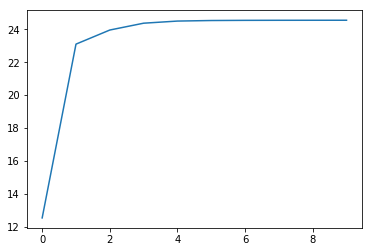

In [44]:
import matplotlib.pyplot as plt
lla = np.shape(lll)[0]

xaxis = [i for i in range(lla)]

plt.plot(xaxis, lll)
plt.xlabel('Number of iterations')
plt.ylabel('Log likelihood')

(182385,)
(983417,)
(2766358,)


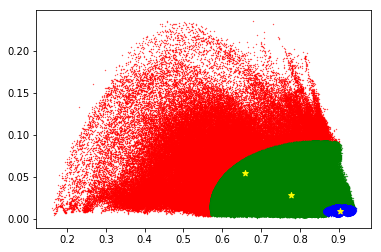

In [32]:
stp = 7

gmc1 = []
gmv1 = []
gmc2 = []
gmv2 = []
gmc3 = []
gmv3 = []

for i in range (l):
    for c in range(k):
        r[i][c] = (wts[c] * math.exp(-0.5 * ((ma[i] - cm[c])**2 / vm[c] + (va[i] - cv[c])**2 / vv[c]))) / (vm[c] * vv[c])**(0.5)
    if(r[i][0] > r[i][1] and r[i][0] > r[i][2]):
        gmc1.append(ma[i])
        gmv1.append(va[i])
    if(r[i][1] > r[i][0] and r[i][1] > r[i][2]):
        gmc2.append(ma[i])
        gmv2.append(va[i])
    if(r[i][2] > r[i][1] and r[i][2] > r[i][0]):
        gmc3.append(ma[i])
        gmv3.append(va[i])
        
print(np.shape(gmc1))
print(np.shape(gmc2))
print(np.shape(gmc3))

plt.scatter(gmc1, gmv1, s=0.1, color='red')
plt.scatter(gmc2, gmv2, s=0.1, color='green')
plt.scatter(gmc3, gmv3, s=0.1, color='blue')
tx = []
ty = []
tx.append(cm[0])
ty.append(cv[0])
plt.scatter(tx, ty, marker='*', color='yellow') 
tx[0] = cm[1]
ty[0] = cv[1]
plt.scatter(tx, ty, marker='*', color='yellow') 
tx[0] = cm[2]
ty[0] = cv[2]
plt.scatter(tx, ty, marker='*', color='yellow') 

In [49]:
for file in os.listdir("./FVTrain4/"):

    stp = 7

    h = 512
    w = 512

    im = Image.new("RGB", (h, w))
    pix = im.load()

    lol = 0
    c1 = 0
    c2 = 0
    c3 = 0

    ma = []
    va = []

    filename = "./FVTrain4/" + file
    fp = open(filename, "r")
    print(file)
    for line in fp:
        line = line.strip('\n')
        fields = line.split(" ")
        ma.append(float(fields[0]))
        va.append(float(fields[1]))

    print(np.shape(r))
    l = np.shape(ma)[0]

    ra = [[0 for i in range(512)] for j in range(512)]
    ga = [[0 for i in range(512)] for j in range(512)]
    ba = [[0 for i in range(512)] for j in range(512)]
    ca = [[0 for i in range(512)] for j in range(512)]

    print(ra[0][0])
    print(ca[0][0])

    for i in range (l):
        tp = 0
        for c in range(k):
            r[i][c] = (wts[c] * math.exp(-0.5 * ((ma[i] - cm[c])**2 / vm[c] + (va[i] - cv[c])**2 / vv[c]))) / (vm[c] * vv[c])**(0.5)
            #print(r[i][c])
            tp += r[i][c]

    for i in range (0,h,2):
        for j in range (0, w, 2):
            #print(lol)
            tv = r[lol][0] + r[lol][1] + r[lol][2]
            rv = r[lol][0] / tv
            gv = r[lol][1] / tv
            bv = r[lol][2] / tv
    #         if(rv > gv and rv > bv):
    #             gmc1.append(ma[i])
    #             gmv1.append(va[i])
    #         if(gv > rv and gv > bv):
    #             gmc2.append(ma[i])
    #             gmv2.append(va[i])
    #         if(bv > gv and bv > rv):
    #             gmc3.append(ma[i])
    #             gmv3.append(va[i])
    # #         d1 = (cm[0] - ma[lol])**2 + (vm[0] - va[lol])**2
    # #         d2 = (cm[1] - ma[lol])**2 + (vm[1] - va[lol])**2
    # #         d3 = (cm[2] - ma[lol])**2 + (vm[2] - va[lol])**2
    #         if(r[lol][0] < r[lol][1] and r[lol][2] < r[lol][1]):
    #             print(1)
    #             cc = (0, 255, 0)
    #             c2 += 1
    #         elif(r[lol][0] < r[lol][2] and r[lol][1] < r[lol][2]):
    #             cc = (0, 0, 255)
    #             print(2)
    #             c3 += 1
    #         else:
    #             print(0)
    #             c1 -= 1
    #             c1 += 1
    #         lol += 1
    # #         if(d1 > d2 and d3 > d2):
    # #             print(1)
    # #             cc = (0, 255, 0)
    # #             c2 += 1
    # #         elif(d1 > d3 and d2 > d3):
    # #             cc = (0, 0, 255)
    # #             print(2)
    # #             c3 += 1
    # #         else:
    # #             print(0)
    # #             c1 -= 1
    # #             c1 += 1
    # #         lol += 1
            for a in range (i, i+stp):
                a = a % h
                for b in range(j,j+stp):
                    b = b % w
                    ra[b][a] += rv
                    ga[b][a] += gv
                    ba[b][a] += bv
                    ca[b][a] += 1
            lol+=1

    for i in range(h):
        for j in range(w):
            #print(i)
            #print(j)
            rv = ra[i][j] / ca[i][j]
            rv = rv * 255
            rv = round(rv)
            gv = ga[i][j] / ca[i][j]
            gv = gv * 255
            gv = round(gv)
            bv = ba[i][j] / ca[i][j]
            bv = bv * 255
            bv = round(bv)
            pix[i,j] = (rv,gv,bv)

    # print(c1)
    # print(c2)
    # print(c3)
    im.save("./GMMTrain/" + file + ".png", "PNG")

106
(3932160, 3)
0
0
107
(3932160, 3)
0
0
108
(3932160, 3)
0
0
109
(3932160, 3)
0
0
110
(3932160, 3)
0
0
111
(3932160, 3)
0
0
112
(3932160, 3)
0
0
113
(3932160, 3)
0
0
114
(3932160, 3)
0
0
115
(3932160, 3)
0
0
116
(3932160, 3)
0
0
117
(3932160, 3)
0
0
118
(3932160, 3)
0
0
119
(3932160, 3)
0
0
120
(3932160, 3)
0
0
121
(3932160, 3)
0
0
122
(3932160, 3)
0
0
123
(3932160, 3)
0
0
124
(3932160, 3)
0
0
125
(3932160, 3)
0
0
126
(3932160, 3)
0
0
127
(3932160, 3)
0
0
128
(3932160, 3)
0
0
29
(3932160, 3)
0
0
30
(3932160, 3)
0
0
31
(3932160, 3)
0
0
32
(3932160, 3)
0
0
33
(3932160, 3)
0
0
34
(3932160, 3)
0
0
35
(3932160, 3)
0
0
36
(3932160, 3)
0
0
37
(3932160, 3)
0
0
38
(3932160, 3)
0
0
39
(3932160, 3)
0
0
40
(3932160, 3)
0
0
41
(3932160, 3)
0
0
42
(3932160, 3)
0
0
43
(3932160, 3)
0
0
44
(3932160, 3)
0
0
45
(3932160, 3)
0
0
61
(3932160, 3)
0
0
62
(3932160, 3)
0
0
63
(3932160, 3)
0
0
64
(3932160, 3)
0
0
65
(3932160, 3)
0
0
66
(3932160, 3)
0
0
67
(3932160, 3)
0
0
68
(3932160, 3)
0
0
69
(3932160, 3)
0

(7971,)
(2475,)
(55090,)


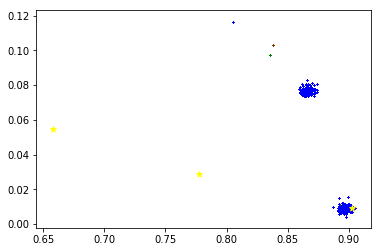

In [26]:
print(np.shape(gmc1))
print(np.shape(gmc2))
print(np.shape(gmc3))

tx = []
ty = []
tx.append(cm[0])
ty.append(cv[0])

plt.scatter(gmc1, gmv1, s=0.1, color='red')
plt.scatter(tx, ty, marker='*', color='yellow') 

tx[0] = cm[1]
ty[0] = cv[1]

plt.scatter(gmc2, gmv2, s=0.1, color='green')
plt.scatter(tx, ty, marker='*', color='yellow') 

tx[0] = cm[2]
ty[0] = cv[2]

plt.scatter(gmc3, gmv3, s=0.1, color='blue')
plt.scatter(tx, ty, marker='*', color='yellow') 